In [19]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from citipy import citipy
from config import weather_key

In [3]:
#Generating random latitude/longitudes to collect random cities
lat_range = (-90, 90)
lng_range = (-180, 180)

lat_lng = []
cities = []

lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lng = zip(lats, lngs)

for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

592

In [42]:
#Performing API calls for each city
base_url = "https://api.openweathermap.org/data/2.5/weather?q="
record = 1

city_names = []
cloudiness = []
countries = []
dates = []
humidity = []
city_lats = []
city_lngs = []
max_temps = []
wind_speed = []

print("""Beginning Data Retrieval
------------------------------""")

for city in cities:
    try:
        target_url = f"{base_url}{city}&appid={weather_key}"
        response = requests.get(target_url)
        response_json = response.json()
        city_names.append(response_json['name'])
        cloudiness.append(response_json['clouds']['all'])
        countries.append(response_json['sys']['country'])
        dates.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        city_lats.append(response_json['coord']['lat'])
        city_lngs.append(response_json['coord']['lon'])
        fahrenheit = (response_json['main']['temp_max'] - 273.13) * (9/5) + 32
        max_temps.append(fahrenheit)
        mph = response_json['wind']['speed'] * 2.23694
        wind_speed.append(mph)
        print(f"Processing record {record} of {len(cities)}| {city}")
        record += 1
    except:
        print("City not found. Skipping...")
        record += 1
        
print("""------------------------------
Data Retrieval Complete
------------------------------""")

Beginning Data Retrieval
------------------------------
Processing record 1 of 592| albany
Processing record 2 of 592| castro
Processing record 3 of 592| camacha
Processing record 4 of 592| bluff
Processing record 5 of 592| kruisfontein
Processing record 6 of 592| taksimo
Processing record 7 of 592| quime
Processing record 8 of 592| coquimbo
Processing record 9 of 592| bedele
City not found. Skipping...
Processing record 11 of 592| nchelenge
Processing record 12 of 592| tuktoyaktuk
City not found. Skipping...
Processing record 14 of 592| jucuaran
Processing record 15 of 592| diamantino
Processing record 16 of 592| bada
Processing record 17 of 592| shkoder
Processing record 18 of 592| carnarvon
Processing record 19 of 592| port alfred
Processing record 20 of 592| esperance
Processing record 21 of 592| pithoragarh
Processing record 22 of 592| hilo
Processing record 23 of 592| sarahan
Processing record 24 of 592| mataura
Processing record 25 of 592| rikitea
Processing record 26 of 592| hu

Processing record 214 of 592| caraquet
Processing record 215 of 592| upernavik
Processing record 216 of 592| vostok
City not found. Skipping...
Processing record 218 of 592| qasigiannguit
Processing record 219 of 592| ballina
Processing record 220 of 592| ingham
Processing record 221 of 592| manokwari
Processing record 222 of 592| skjervoy
City not found. Skipping...
Processing record 224 of 592| obo
Processing record 225 of 592| port macquarie
Processing record 226 of 592| rawson
City not found. Skipping...
City not found. Skipping...
Processing record 229 of 592| grand gaube
Processing record 230 of 592| svetlaya
Processing record 231 of 592| aklavik
Processing record 232 of 592| grindavik
Processing record 233 of 592| bathsheba
Processing record 234 of 592| komsomolskiy
Processing record 235 of 592| qaanaaq
Processing record 236 of 592| tommot
Processing record 237 of 592| amahai
Processing record 238 of 592| mazamitla
Processing record 239 of 592| kidal
Processing record 240 of 592

City not found. Skipping...
Processing record 429 of 592| leninskoye
Processing record 430 of 592| chegdomyn
Processing record 431 of 592| mayumba
Processing record 432 of 592| vezirkopru
Processing record 433 of 592| clyde river
Processing record 434 of 592| tadine
Processing record 435 of 592| talnakh
Processing record 436 of 592| atambua
Processing record 437 of 592| maniitsoq
Processing record 438 of 592| kichera
Processing record 439 of 592| buritis
Processing record 440 of 592| vedea
Processing record 441 of 592| zeya
Processing record 442 of 592| ilirska bistrica
Processing record 443 of 592| lompoc
City not found. Skipping...
Processing record 445 of 592| vanavara
Processing record 446 of 592| comodoro rivadavia
City not found. Skipping...
Processing record 448 of 592| port lincoln
Processing record 449 of 592| poian
Processing record 450 of 592| chala
Processing record 451 of 592| point pedro
Processing record 452 of 592| sagaing
Processing record 453 of 592| sao filipe
Proces

In [43]:
#Create dataframe from data 
cities_dict = {"City": city_names, "Cloudiness": cloudiness, "Country": countries, "Date": dates, "Humidity": humidity, 
             "Lat": city_lats, "Lng": city_lngs, "Max Temp": max_temps, "Wind Speed": wind_speed}

cities_df = pd.DataFrame(cities_dict)
cities_df.to_csv("../WeatherPy/output_data.csv", index=False, header=True)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,1,US,1583835388,52,42.60,-73.97,51.044,3.355410
1,Castro,61,BR,1583835389,99,-24.79,-50.01,54.302,2.102724
2,Camacha,13,PT,1583835389,72,33.08,-16.33,68.036,16.105968
3,Bluff,95,NZ,1583835389,92,-46.60,168.33,48.038,4.026492
4,Kruisfontein,100,ZA,1583835389,64,-34.00,24.73,72.104,9.529364


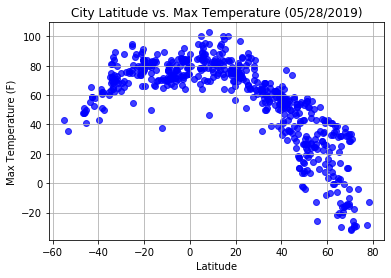

In [48]:
#Latitude vs. Temperature
latitudes = cities_df['Lat']
temperature = cities_df['Max Temp']
lat_temp = plt.scatter(latitudes, temperature, facecolor='blue', alpha=0.75)
plt.title("City Latitude vs. Max Temperature (05/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('Lat_Temp.png')

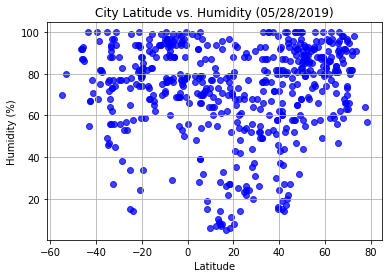

In [47]:
#Latitude vs. Humidity
humidities = cities_df['Humidity']
lat_hum = plt.scatter(latitudes, humidities, facecolor='blue', alpha=0.75)
plt.title("City Latitude vs. Humidity (05/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Lat_Hum.png")

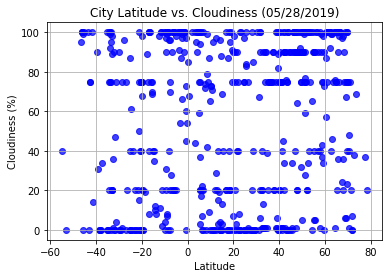

In [46]:
#Latitude vs. Cloudiness
clouds = cities_df['Cloudiness']
lat_cloud = plt.scatter(latitudes, clouds, facecolor='blue', alpha=0.75)
plt.title("City Latitude vs. Cloudiness (05/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Lat_Cloud.png")

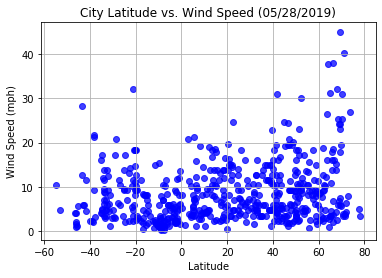

In [45]:
#Latitude vs. Wind Speed
wind = cities_df['Wind Speed']
lat_wind = plt.scatter(latitudes, wind, facecolor='blue', alpha=0.75)
plt.title("City Latitude vs. Wind Speed (05/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Lat_Wind.png")

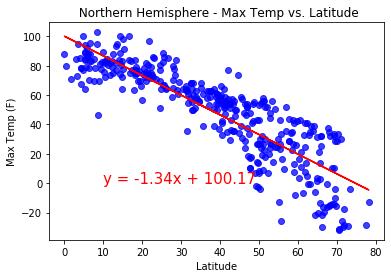

The r-squared is: -0.8651852775479836


In [68]:
#Linear Regression
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
north_df = cities_df[cities_df['Lat'] >= 0]
north_lat = north_df['Lat']
north_temp = north_df['Max Temp']

plt.scatter(north_lat, north_temp, facecolor='blue', alpha=0.75)
plt.title(" Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")

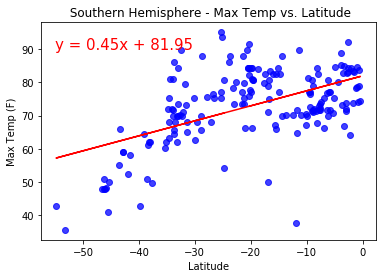

The r-squared is: 0.5417354181579125


In [67]:
# Southern Hemisphere - Max Temp vs. Latitude
south_df = cities_df[cities_df['Lat'] < 0]
south_lat = south_df['Lat']
south_temp = south_df['Max Temp']

plt.scatter(south_lat, south_temp, facecolor='blue', alpha=0.75)
plt.title(" Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")

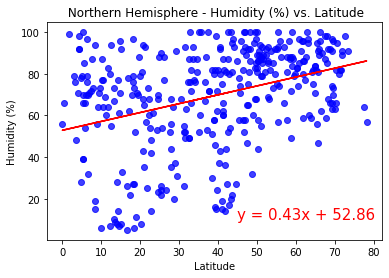

The r-squared is: 0.35470883390252483


In [71]:
#Northern Hemisphere - Humidity (%) vs. Latitude
north_hum = north_df['Humidity']

plt.scatter(north_lat, north_hum, facecolor='blue', alpha=0.75)
plt.title(" Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")


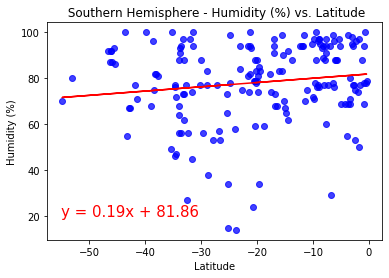

The r-squared is: 0.14376034695023956


In [73]:
#Southern Hemisphere - Humidity (%) vs. Latitude
south_hum = south_df['Humidity']

plt.scatter(south_lat, south_hum, facecolor='blue', alpha=0.75)
plt.title(" Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_hum)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")

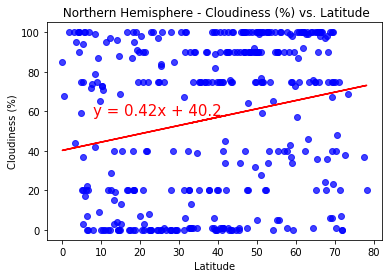

The r-squared is: 0.21607994350604645


In [79]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
north_cloud = north_df['Cloudiness']

plt.scatter(north_lat, north_cloud, facecolor='blue', alpha=0.75)
plt.title(" Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(8,58),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")

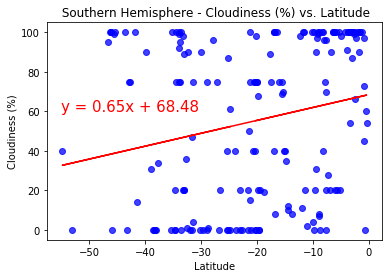

The r-squared is: 0.2181286200475596


In [81]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
south_cloud = south_df['Cloudiness']

plt.scatter(south_lat, south_cloud, facecolor='blue', alpha=0.75)
plt.title(" Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")

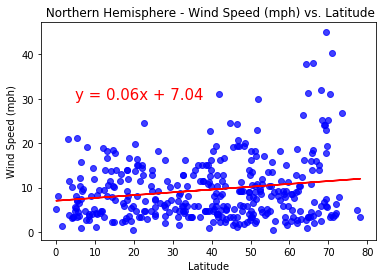

The r-squared is: 0.18074350783712098


In [85]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
north_wind = north_df['Wind Speed']

plt.scatter(north_lat, north_wind, facecolor='blue', alpha=0.75)
plt.title(" Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")

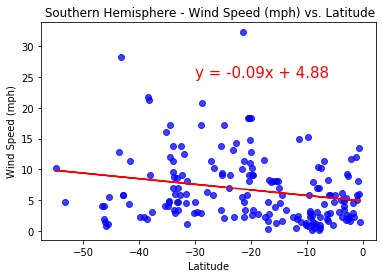

The r-squared is: -0.22423727191768966


In [88]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
south_wind = south_df['Wind Speed']

plt.scatter(south_lat, south_wind, facecolor='blue', alpha=0.75)
plt.title(" Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")